# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = '/data'
!pip install matplotlib==2.0.2
# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

    100% |████████████████████████████████| 14.6MB 36kB/s  eta 0:00:01
  Found existing installation: matplotlib 2.1.0
    Uninstalling matplotlib-2.1.0:
      Successfully uninstalled matplotlib-2.1.0
You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

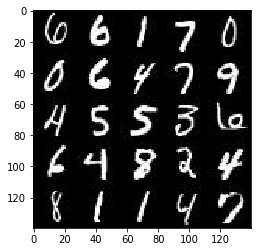

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

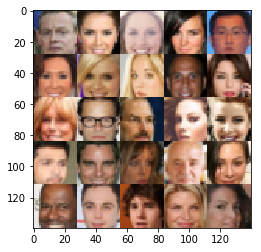

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    real_inputs = tf.placeholder(tf.float32,(None, image_width, image_height, image_channels), "input_real")
    
    z_inputs = tf.placeholder(tf.float32, (None, z_dim), "input_z")
    learning_rate = tf.placeholder(tf.float32, (), "lr")
    
    return real_inputs, z_inputs, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    alpha=0.2
    keep_prob=0.9
    
    with tf.variable_scope('discriminator', reuse=reuse):
        
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same', activation=None)
        relu1 = tf.maximum(alpha*x1, x1)
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same', activation=None)
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha*bn2, bn2)
        drop2 = tf.nn.dropout(relu2, keep_prob=keep_prob)

        x3 = tf.layers.conv2d(drop2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha*bn3, bn3)
        drop3 = tf.nn.dropout(relu3, keep_prob=keep_prob)

        flat = tf.reshape(drop3, (-1, 4*4*256))
    
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    alpha=0.2
    
    with tf.variable_scope('generator', reuse = not is_train):
    
        x1 = tf.layers.dense(z, 7*7*512)
        x1 = tf.reshape(x1, (-1,7,7,512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha*x1, x1)
        x1 = tf.nn.dropout(x1, keep_prob=keep_prob)
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same', activation=None)
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha*x2, x2)
        x2 = tf.nn.dropout(x2, keep_prob=keep_prob)
            
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same', activation=None)
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha*x3, x3)
        
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 3, strides=1, padding='same', activation=None)
        out = tf.tanh(logits)

        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    smooth = 0.1
    gen = generator(input_z, out_channel_dim, is_train=True)
    d_real, d_logits_real = discriminator(input_real, reuse=False)
    d_fake, d_logits_fake = discriminator(gen, reuse=True)
    
    d_labels_real = tf.ones_like(d_real) * (1 -smooth)
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=d_labels_real))
    
    d_labels_fake = tf.zeros_like(d_fake)
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=d_labels_fake))
    
    d_loss = d_loss_real + d_loss_fake
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_fake)))
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
        
    return d_train, g_train


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_train, g_train = model_opt(d_loss, g_loss, lr, beta1)

    saver = tf.train.Saver()
    samples,losses = [], []
    step = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                
                # TODO: Train Model
                step += 1
                batch_images *= 2
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(d_train, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                _ = sess.run(g_train, feed_dict={input_real: batch_images, input_z: batch_z, lr:learning_rate})
                   
    
                if step % 10 == 0:
                    
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                   
                    losses.append((train_loss_d, train_loss_g))


                if step % 100 == 0:
                    show_generator_output(sess, 16, input_z, data_shape[3], data_image_mode)
                    

        saver.save(sess, './generator.ckpt')

                
    return losses

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.4099... Generator Loss: 3.8263
Epoch 1/2... Discriminator Loss: 0.4222... Generator Loss: 2.8712
Epoch 1/2... Discriminator Loss: 0.4332... Generator Loss: 4.1167
Epoch 1/2... Discriminator Loss: 0.3760... Generator Loss: 4.4386
Epoch 1/2... Discriminator Loss: 0.4196... Generator Loss: 2.9487
Epoch 1/2... Discriminator Loss: 0.5223... Generator Loss: 2.6556
Epoch 1/2... Discriminator Loss: 0.5576... Generator Loss: 2.9559
Epoch 1/2... Discriminator Loss: 1.1156... Generator Loss: 1.7675
Epoch 1/2... Discriminator Loss: 1.0971... Generator Loss: 1.1704
Epoch 1/2... Discriminator Loss: 1.4556... Generator Loss: 0.5620


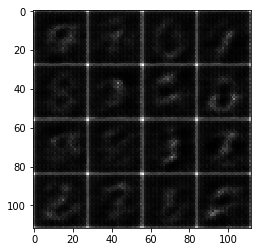

Epoch 1/2... Discriminator Loss: 1.4763... Generator Loss: 1.2481
Epoch 1/2... Discriminator Loss: 1.2601... Generator Loss: 0.7503
Epoch 1/2... Discriminator Loss: 1.3206... Generator Loss: 1.0561
Epoch 1/2... Discriminator Loss: 1.3573... Generator Loss: 0.7540
Epoch 1/2... Discriminator Loss: 1.2335... Generator Loss: 1.0986
Epoch 1/2... Discriminator Loss: 1.4243... Generator Loss: 0.5561
Epoch 1/2... Discriminator Loss: 1.2423... Generator Loss: 1.1612
Epoch 1/2... Discriminator Loss: 1.1830... Generator Loss: 1.2080
Epoch 1/2... Discriminator Loss: 1.0605... Generator Loss: 1.0947
Epoch 1/2... Discriminator Loss: 1.2064... Generator Loss: 1.6801


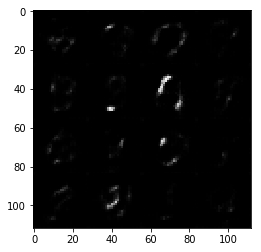

Epoch 1/2... Discriminator Loss: 1.1966... Generator Loss: 1.8393
Epoch 1/2... Discriminator Loss: 1.1825... Generator Loss: 0.7281
Epoch 1/2... Discriminator Loss: 0.9600... Generator Loss: 1.1716
Epoch 1/2... Discriminator Loss: 1.0493... Generator Loss: 1.0230
Epoch 1/2... Discriminator Loss: 1.2058... Generator Loss: 0.6670
Epoch 1/2... Discriminator Loss: 1.3916... Generator Loss: 2.3355
Epoch 1/2... Discriminator Loss: 1.0025... Generator Loss: 0.9493
Epoch 1/2... Discriminator Loss: 0.9097... Generator Loss: 1.3288
Epoch 1/2... Discriminator Loss: 1.3122... Generator Loss: 0.6599
Epoch 1/2... Discriminator Loss: 0.8120... Generator Loss: 1.4374


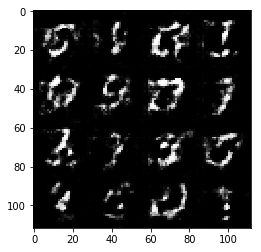

Epoch 1/2... Discriminator Loss: 0.9741... Generator Loss: 1.1985
Epoch 1/2... Discriminator Loss: 0.9550... Generator Loss: 1.6015
Epoch 1/2... Discriminator Loss: 1.6281... Generator Loss: 0.3726
Epoch 1/2... Discriminator Loss: 1.4007... Generator Loss: 0.4994
Epoch 1/2... Discriminator Loss: 1.0185... Generator Loss: 0.8915
Epoch 1/2... Discriminator Loss: 1.5357... Generator Loss: 0.4158
Epoch 1/2... Discriminator Loss: 1.0934... Generator Loss: 0.7761
Epoch 1/2... Discriminator Loss: 1.1472... Generator Loss: 0.7876
Epoch 1/2... Discriminator Loss: 1.3190... Generator Loss: 0.6217
Epoch 1/2... Discriminator Loss: 1.0485... Generator Loss: 1.5519


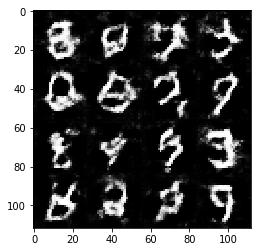

Epoch 1/2... Discriminator Loss: 1.1120... Generator Loss: 1.7590
Epoch 1/2... Discriminator Loss: 1.2670... Generator Loss: 0.6026
Epoch 1/2... Discriminator Loss: 1.5352... Generator Loss: 2.6868
Epoch 1/2... Discriminator Loss: 1.0598... Generator Loss: 1.1964
Epoch 1/2... Discriminator Loss: 1.1703... Generator Loss: 0.8144
Epoch 1/2... Discriminator Loss: 1.3573... Generator Loss: 2.0653
Epoch 1/2... Discriminator Loss: 1.1191... Generator Loss: 0.8549
Epoch 1/2... Discriminator Loss: 1.0503... Generator Loss: 0.8383
Epoch 1/2... Discriminator Loss: 1.0468... Generator Loss: 1.2329
Epoch 1/2... Discriminator Loss: 1.2048... Generator Loss: 0.6877


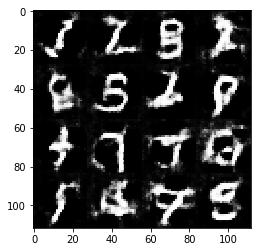

Epoch 1/2... Discriminator Loss: 0.9709... Generator Loss: 1.0470
Epoch 1/2... Discriminator Loss: 1.1605... Generator Loss: 0.8341
Epoch 1/2... Discriminator Loss: 1.1086... Generator Loss: 1.0365
Epoch 1/2... Discriminator Loss: 1.1815... Generator Loss: 0.7489
Epoch 1/2... Discriminator Loss: 1.1090... Generator Loss: 1.2373
Epoch 1/2... Discriminator Loss: 1.1470... Generator Loss: 1.0188
Epoch 1/2... Discriminator Loss: 1.0640... Generator Loss: 1.1607
Epoch 1/2... Discriminator Loss: 1.2355... Generator Loss: 0.6863
Epoch 1/2... Discriminator Loss: 1.0917... Generator Loss: 1.2115
Epoch 1/2... Discriminator Loss: 1.0457... Generator Loss: 1.2093


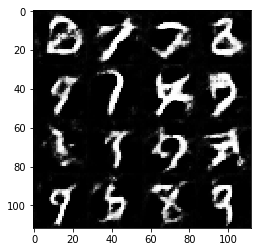

Epoch 1/2... Discriminator Loss: 1.2179... Generator Loss: 0.7256
Epoch 1/2... Discriminator Loss: 1.1440... Generator Loss: 1.0900
Epoch 1/2... Discriminator Loss: 1.1623... Generator Loss: 0.7588
Epoch 1/2... Discriminator Loss: 1.0865... Generator Loss: 0.8615
Epoch 1/2... Discriminator Loss: 1.0831... Generator Loss: 1.3763
Epoch 1/2... Discriminator Loss: 1.0185... Generator Loss: 1.1139
Epoch 1/2... Discriminator Loss: 1.0578... Generator Loss: 0.9631
Epoch 1/2... Discriminator Loss: 1.1156... Generator Loss: 1.0268
Epoch 1/2... Discriminator Loss: 1.2619... Generator Loss: 0.6529
Epoch 1/2... Discriminator Loss: 1.2036... Generator Loss: 0.7320


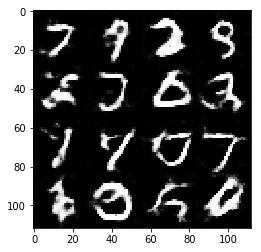

Epoch 1/2... Discriminator Loss: 1.0778... Generator Loss: 1.1372
Epoch 1/2... Discriminator Loss: 1.0573... Generator Loss: 1.1646
Epoch 1/2... Discriminator Loss: 1.1777... Generator Loss: 0.9061
Epoch 1/2... Discriminator Loss: 1.0174... Generator Loss: 1.0115
Epoch 1/2... Discriminator Loss: 0.9883... Generator Loss: 1.1074
Epoch 1/2... Discriminator Loss: 1.3610... Generator Loss: 0.5283
Epoch 1/2... Discriminator Loss: 1.1710... Generator Loss: 0.7069
Epoch 1/2... Discriminator Loss: 1.0020... Generator Loss: 1.0074
Epoch 1/2... Discriminator Loss: 1.1371... Generator Loss: 0.7330
Epoch 1/2... Discriminator Loss: 1.4897... Generator Loss: 0.4843


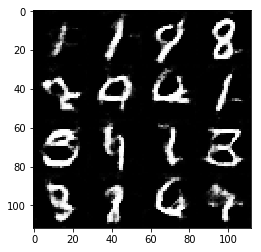

Epoch 1/2... Discriminator Loss: 1.2575... Generator Loss: 0.6450
Epoch 1/2... Discriminator Loss: 1.0388... Generator Loss: 1.2385
Epoch 1/2... Discriminator Loss: 1.1712... Generator Loss: 0.6865
Epoch 1/2... Discriminator Loss: 1.3952... Generator Loss: 0.5646
Epoch 1/2... Discriminator Loss: 1.0058... Generator Loss: 0.9810
Epoch 1/2... Discriminator Loss: 1.0577... Generator Loss: 1.0643
Epoch 1/2... Discriminator Loss: 1.4825... Generator Loss: 2.5079
Epoch 1/2... Discriminator Loss: 1.0225... Generator Loss: 1.1911
Epoch 1/2... Discriminator Loss: 1.1650... Generator Loss: 0.7088
Epoch 1/2... Discriminator Loss: 1.1079... Generator Loss: 1.2733


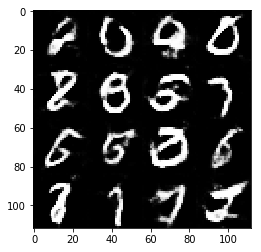

Epoch 1/2... Discriminator Loss: 1.0238... Generator Loss: 0.8750
Epoch 1/2... Discriminator Loss: 1.0806... Generator Loss: 0.8266
Epoch 1/2... Discriminator Loss: 1.4830... Generator Loss: 0.4460
Epoch 2/2... Discriminator Loss: 0.9461... Generator Loss: 1.1843
Epoch 2/2... Discriminator Loss: 0.9683... Generator Loss: 1.2782
Epoch 2/2... Discriminator Loss: 1.1467... Generator Loss: 0.7325
Epoch 2/2... Discriminator Loss: 1.1013... Generator Loss: 0.8207
Epoch 2/2... Discriminator Loss: 1.0681... Generator Loss: 0.8075
Epoch 2/2... Discriminator Loss: 1.1035... Generator Loss: 1.0495
Epoch 2/2... Discriminator Loss: 1.0654... Generator Loss: 1.4851


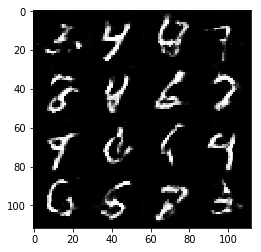

Epoch 2/2... Discriminator Loss: 0.9983... Generator Loss: 1.0918
Epoch 2/2... Discriminator Loss: 1.0549... Generator Loss: 0.8849
Epoch 2/2... Discriminator Loss: 0.9930... Generator Loss: 0.9021
Epoch 2/2... Discriminator Loss: 1.0107... Generator Loss: 1.2293
Epoch 2/2... Discriminator Loss: 1.1075... Generator Loss: 0.7438
Epoch 2/2... Discriminator Loss: 0.9113... Generator Loss: 1.4706
Epoch 2/2... Discriminator Loss: 1.1674... Generator Loss: 0.7419
Epoch 2/2... Discriminator Loss: 1.0417... Generator Loss: 0.8800
Epoch 2/2... Discriminator Loss: 0.9744... Generator Loss: 0.9048
Epoch 2/2... Discriminator Loss: 1.1531... Generator Loss: 0.6822


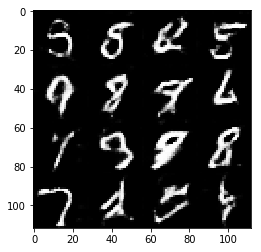

Epoch 2/2... Discriminator Loss: 1.0779... Generator Loss: 1.9579
Epoch 2/2... Discriminator Loss: 0.9875... Generator Loss: 0.9747
Epoch 2/2... Discriminator Loss: 0.9762... Generator Loss: 1.5856
Epoch 2/2... Discriminator Loss: 1.0976... Generator Loss: 0.8607
Epoch 2/2... Discriminator Loss: 0.9730... Generator Loss: 1.1602
Epoch 2/2... Discriminator Loss: 0.9075... Generator Loss: 0.9549
Epoch 2/2... Discriminator Loss: 1.0059... Generator Loss: 1.5283
Epoch 2/2... Discriminator Loss: 1.0885... Generator Loss: 0.7885
Epoch 2/2... Discriminator Loss: 1.1853... Generator Loss: 0.6537
Epoch 2/2... Discriminator Loss: 1.0678... Generator Loss: 0.8799


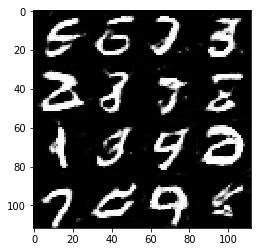

Epoch 2/2... Discriminator Loss: 1.0236... Generator Loss: 1.2073
Epoch 2/2... Discriminator Loss: 1.0250... Generator Loss: 0.9708
Epoch 2/2... Discriminator Loss: 0.9749... Generator Loss: 1.5729
Epoch 2/2... Discriminator Loss: 0.9397... Generator Loss: 0.9850
Epoch 2/2... Discriminator Loss: 0.9946... Generator Loss: 0.9309
Epoch 2/2... Discriminator Loss: 1.1511... Generator Loss: 0.7736
Epoch 2/2... Discriminator Loss: 0.9408... Generator Loss: 1.2356
Epoch 2/2... Discriminator Loss: 1.0989... Generator Loss: 0.9528
Epoch 2/2... Discriminator Loss: 1.0594... Generator Loss: 0.8957
Epoch 2/2... Discriminator Loss: 1.1626... Generator Loss: 0.7131


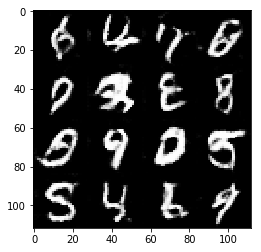

Epoch 2/2... Discriminator Loss: 1.3037... Generator Loss: 0.5545
Epoch 2/2... Discriminator Loss: 1.2239... Generator Loss: 0.7392
Epoch 2/2... Discriminator Loss: 1.1255... Generator Loss: 0.7620
Epoch 2/2... Discriminator Loss: 1.2217... Generator Loss: 0.6981
Epoch 2/2... Discriminator Loss: 0.9856... Generator Loss: 1.1147
Epoch 2/2... Discriminator Loss: 0.9030... Generator Loss: 1.2282
Epoch 2/2... Discriminator Loss: 1.0471... Generator Loss: 0.8800
Epoch 2/2... Discriminator Loss: 1.0385... Generator Loss: 0.7985
Epoch 2/2... Discriminator Loss: 0.8835... Generator Loss: 1.4011
Epoch 2/2... Discriminator Loss: 1.0569... Generator Loss: 1.5846


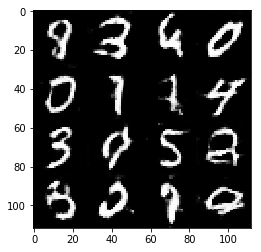

Epoch 2/2... Discriminator Loss: 1.0125... Generator Loss: 0.8653
Epoch 2/2... Discriminator Loss: 1.0666... Generator Loss: 0.7889
Epoch 2/2... Discriminator Loss: 0.8300... Generator Loss: 1.3000
Epoch 2/2... Discriminator Loss: 1.0562... Generator Loss: 0.8336
Epoch 2/2... Discriminator Loss: 1.7223... Generator Loss: 0.3644
Epoch 2/2... Discriminator Loss: 0.9196... Generator Loss: 1.0944
Epoch 2/2... Discriminator Loss: 0.9847... Generator Loss: 1.9312
Epoch 2/2... Discriminator Loss: 0.9974... Generator Loss: 0.9363
Epoch 2/2... Discriminator Loss: 1.1024... Generator Loss: 0.7399
Epoch 2/2... Discriminator Loss: 1.7193... Generator Loss: 0.3701


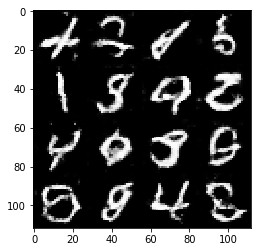

Epoch 2/2... Discriminator Loss: 1.1064... Generator Loss: 1.0121
Epoch 2/2... Discriminator Loss: 0.9880... Generator Loss: 0.9899
Epoch 2/2... Discriminator Loss: 0.9574... Generator Loss: 1.0788
Epoch 2/2... Discriminator Loss: 1.0499... Generator Loss: 0.9387
Epoch 2/2... Discriminator Loss: 0.8940... Generator Loss: 1.0673
Epoch 2/2... Discriminator Loss: 0.9636... Generator Loss: 1.1568
Epoch 2/2... Discriminator Loss: 1.0457... Generator Loss: 0.9860
Epoch 2/2... Discriminator Loss: 0.9800... Generator Loss: 0.9400
Epoch 2/2... Discriminator Loss: 1.6115... Generator Loss: 0.4756
Epoch 2/2... Discriminator Loss: 0.9729... Generator Loss: 0.9223


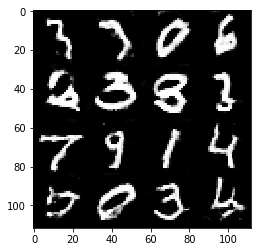

Epoch 2/2... Discriminator Loss: 0.9812... Generator Loss: 1.3235
Epoch 2/2... Discriminator Loss: 1.3405... Generator Loss: 0.5656
Epoch 2/2... Discriminator Loss: 1.1071... Generator Loss: 1.0516
Epoch 2/2... Discriminator Loss: 1.1186... Generator Loss: 0.7838
Epoch 2/2... Discriminator Loss: 0.9066... Generator Loss: 1.2907
Epoch 2/2... Discriminator Loss: 1.0393... Generator Loss: 0.8486
Epoch 2/2... Discriminator Loss: 0.8776... Generator Loss: 1.5446
Epoch 2/2... Discriminator Loss: 0.9212... Generator Loss: 1.2362
Epoch 2/2... Discriminator Loss: 0.9947... Generator Loss: 0.9024
Epoch 2/2... Discriminator Loss: 1.1306... Generator Loss: 0.7727


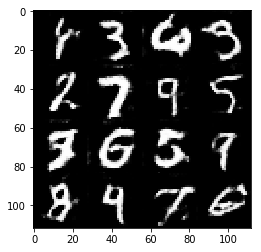

Epoch 2/2... Discriminator Loss: 1.1834... Generator Loss: 0.7006
Epoch 2/2... Discriminator Loss: 0.9288... Generator Loss: 1.4147
Epoch 2/2... Discriminator Loss: 1.2439... Generator Loss: 0.6352
Epoch 2/2... Discriminator Loss: 1.1671... Generator Loss: 0.7200
Epoch 2/2... Discriminator Loss: 1.2027... Generator Loss: 2.2440
Epoch 2/2... Discriminator Loss: 1.0508... Generator Loss: 0.8093
Epoch 2/2... Discriminator Loss: 1.0847... Generator Loss: 0.8001
Epoch 2/2... Discriminator Loss: 0.8459... Generator Loss: 1.0561
Epoch 2/2... Discriminator Loss: 1.5388... Generator Loss: 0.4721
Epoch 2/2... Discriminator Loss: 0.9395... Generator Loss: 1.0659


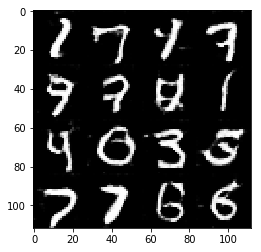

Epoch 2/2... Discriminator Loss: 0.8977... Generator Loss: 1.8256
Epoch 2/2... Discriminator Loss: 1.7242... Generator Loss: 0.3679
Epoch 2/2... Discriminator Loss: 0.9708... Generator Loss: 1.1167
Epoch 2/2... Discriminator Loss: 0.8921... Generator Loss: 1.3557
Epoch 2/2... Discriminator Loss: 1.0415... Generator Loss: 0.7847
Epoch 2/2... Discriminator Loss: 0.9143... Generator Loss: 1.1850
Epoch 2/2... Discriminator Loss: 1.4408... Generator Loss: 0.4825


In [18]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.3


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/2... Discriminator Loss: 0.5383... Generator Loss: 24.7415
Epoch 1/2... Discriminator Loss: 0.3869... Generator Loss: 5.8823
Epoch 1/2... Discriminator Loss: 0.5561... Generator Loss: 2.7493
Epoch 1/2... Discriminator Loss: 2.5340... Generator Loss: 0.3844
Epoch 1/2... Discriminator Loss: 1.0037... Generator Loss: 1.7876
Epoch 1/2... Discriminator Loss: 0.6365... Generator Loss: 2.4841
Epoch 1/2... Discriminator Loss: 0.7256... Generator Loss: 2.0540
Epoch 1/2... Discriminator Loss: 0.6983... Generator Loss: 1.8685
Epoch 1/2... Discriminator Loss: 0.8884... Generator Loss: 2.0804
Epoch 1/2... Discriminator Loss: 1.4329... Generator Loss: 0.4944


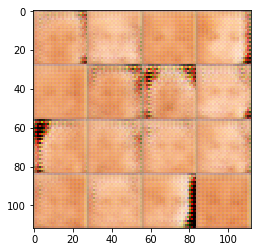

Epoch 1/2... Discriminator Loss: 1.1302... Generator Loss: 1.5284
Epoch 1/2... Discriminator Loss: 2.9013... Generator Loss: 0.1506
Epoch 1/2... Discriminator Loss: 1.4978... Generator Loss: 0.8033
Epoch 1/2... Discriminator Loss: 1.1931... Generator Loss: 1.1032
Epoch 1/2... Discriminator Loss: 1.2087... Generator Loss: 0.7711
Epoch 1/2... Discriminator Loss: 1.1697... Generator Loss: 0.7467
Epoch 1/2... Discriminator Loss: 1.6562... Generator Loss: 0.4937
Epoch 1/2... Discriminator Loss: 1.0414... Generator Loss: 1.0601
Epoch 1/2... Discriminator Loss: 1.3488... Generator Loss: 0.7520
Epoch 1/2... Discriminator Loss: 1.4080... Generator Loss: 0.6467


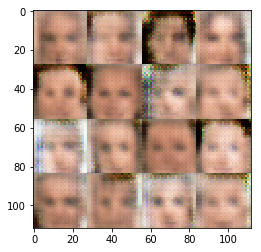

Epoch 1/2... Discriminator Loss: 1.8477... Generator Loss: 2.0509
Epoch 1/2... Discriminator Loss: 1.3623... Generator Loss: 0.5955
Epoch 1/2... Discriminator Loss: 1.2703... Generator Loss: 1.0535
Epoch 1/2... Discriminator Loss: 1.3769... Generator Loss: 0.5481
Epoch 1/2... Discriminator Loss: 2.2815... Generator Loss: 0.2006
Epoch 1/2... Discriminator Loss: 1.2366... Generator Loss: 0.8850
Epoch 1/2... Discriminator Loss: 1.3956... Generator Loss: 0.7505
Epoch 1/2... Discriminator Loss: 1.1583... Generator Loss: 1.1183
Epoch 1/2... Discriminator Loss: 1.0774... Generator Loss: 1.1691
Epoch 1/2... Discriminator Loss: 1.6329... Generator Loss: 1.7465


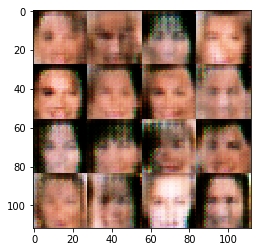

Epoch 1/2... Discriminator Loss: 2.5859... Generator Loss: 2.9816
Epoch 1/2... Discriminator Loss: 1.6002... Generator Loss: 0.5510
Epoch 1/2... Discriminator Loss: 0.9798... Generator Loss: 1.0122
Epoch 1/2... Discriminator Loss: 1.2199... Generator Loss: 0.8206
Epoch 1/2... Discriminator Loss: 1.2067... Generator Loss: 0.9545
Epoch 1/2... Discriminator Loss: 1.2242... Generator Loss: 1.0060
Epoch 1/2... Discriminator Loss: 1.2988... Generator Loss: 0.8803
Epoch 1/2... Discriminator Loss: 1.7121... Generator Loss: 0.3566
Epoch 1/2... Discriminator Loss: 1.3965... Generator Loss: 0.7012
Epoch 1/2... Discriminator Loss: 1.2755... Generator Loss: 0.5920


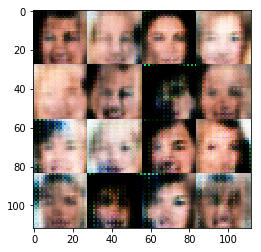

Epoch 1/2... Discriminator Loss: 1.4807... Generator Loss: 0.4998
Epoch 1/2... Discriminator Loss: 1.8224... Generator Loss: 0.3115
Epoch 1/2... Discriminator Loss: 1.2821... Generator Loss: 0.8459
Epoch 1/2... Discriminator Loss: 1.3626... Generator Loss: 0.8173
Epoch 1/2... Discriminator Loss: 1.2089... Generator Loss: 0.8523
Epoch 1/2... Discriminator Loss: 1.1536... Generator Loss: 1.2043
Epoch 1/2... Discriminator Loss: 1.3863... Generator Loss: 0.6508
Epoch 1/2... Discriminator Loss: 1.1973... Generator Loss: 0.9945
Epoch 1/2... Discriminator Loss: 1.1439... Generator Loss: 0.9985
Epoch 1/2... Discriminator Loss: 1.2640... Generator Loss: 0.7783


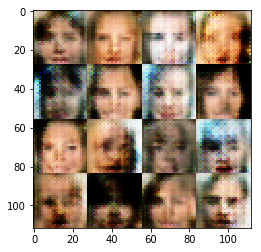

Epoch 1/2... Discriminator Loss: 2.4169... Generator Loss: 2.5262
Epoch 1/2... Discriminator Loss: 1.3476... Generator Loss: 1.0824
Epoch 1/2... Discriminator Loss: 1.4795... Generator Loss: 0.8062
Epoch 1/2... Discriminator Loss: 1.3841... Generator Loss: 0.7313
Epoch 1/2... Discriminator Loss: 1.4601... Generator Loss: 1.0424
Epoch 1/2... Discriminator Loss: 1.5461... Generator Loss: 0.6928
Epoch 1/2... Discriminator Loss: 1.3849... Generator Loss: 0.8746
Epoch 1/2... Discriminator Loss: 1.4883... Generator Loss: 0.7271
Epoch 1/2... Discriminator Loss: 1.4474... Generator Loss: 0.8068
Epoch 1/2... Discriminator Loss: 1.3995... Generator Loss: 0.8456


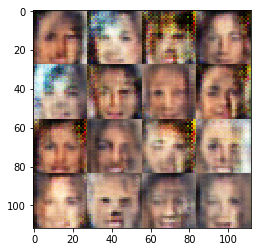

Epoch 1/2... Discriminator Loss: 1.3959... Generator Loss: 0.8160
Epoch 1/2... Discriminator Loss: 1.3370... Generator Loss: 0.7415
Epoch 1/2... Discriminator Loss: 1.3579... Generator Loss: 0.9096
Epoch 1/2... Discriminator Loss: 1.3948... Generator Loss: 0.8145
Epoch 1/2... Discriminator Loss: 1.3289... Generator Loss: 0.8958
Epoch 1/2... Discriminator Loss: 1.4547... Generator Loss: 0.7703
Epoch 1/2... Discriminator Loss: 1.3442... Generator Loss: 0.7356
Epoch 1/2... Discriminator Loss: 1.3265... Generator Loss: 0.7965
Epoch 1/2... Discriminator Loss: 1.2962... Generator Loss: 0.6607
Epoch 1/2... Discriminator Loss: 1.5159... Generator Loss: 0.6962


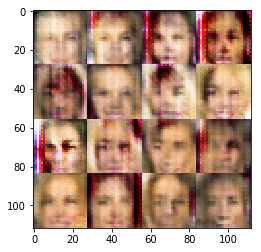

Epoch 1/2... Discriminator Loss: 0.9905... Generator Loss: 0.9635
Epoch 1/2... Discriminator Loss: 1.5116... Generator Loss: 0.4779
Epoch 1/2... Discriminator Loss: 1.1796... Generator Loss: 1.3837
Epoch 1/2... Discriminator Loss: 1.4005... Generator Loss: 1.2308
Epoch 1/2... Discriminator Loss: 1.1307... Generator Loss: 0.9385
Epoch 1/2... Discriminator Loss: 1.3613... Generator Loss: 0.9995
Epoch 1/2... Discriminator Loss: 1.3509... Generator Loss: 0.8598
Epoch 1/2... Discriminator Loss: 1.3086... Generator Loss: 0.8629
Epoch 1/2... Discriminator Loss: 1.4252... Generator Loss: 0.7730
Epoch 1/2... Discriminator Loss: 1.4148... Generator Loss: 0.7942


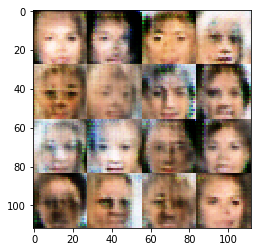

Epoch 1/2... Discriminator Loss: 1.4463... Generator Loss: 0.7911
Epoch 1/2... Discriminator Loss: 1.2181... Generator Loss: 0.9584
Epoch 1/2... Discriminator Loss: 1.2437... Generator Loss: 0.8716
Epoch 1/2... Discriminator Loss: 1.2237... Generator Loss: 1.0171
Epoch 1/2... Discriminator Loss: 0.6834... Generator Loss: 1.4662
Epoch 1/2... Discriminator Loss: 2.2480... Generator Loss: 0.5583
Epoch 1/2... Discriminator Loss: 1.3761... Generator Loss: 1.0618
Epoch 1/2... Discriminator Loss: 1.2756... Generator Loss: 0.9728
Epoch 1/2... Discriminator Loss: 1.3847... Generator Loss: 0.9571
Epoch 1/2... Discriminator Loss: 1.4259... Generator Loss: 1.0102


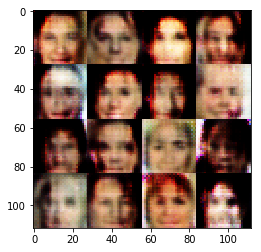

Epoch 1/2... Discriminator Loss: 1.4886... Generator Loss: 0.9294
Epoch 1/2... Discriminator Loss: 1.5104... Generator Loss: 0.7765
Epoch 1/2... Discriminator Loss: 1.3598... Generator Loss: 0.7827
Epoch 1/2... Discriminator Loss: 1.3184... Generator Loss: 0.8267
Epoch 1/2... Discriminator Loss: 1.3484... Generator Loss: 0.8499
Epoch 1/2... Discriminator Loss: 1.3457... Generator Loss: 0.8202
Epoch 1/2... Discriminator Loss: 1.3093... Generator Loss: 0.7413
Epoch 1/2... Discriminator Loss: 1.4082... Generator Loss: 0.7013
Epoch 1/2... Discriminator Loss: 1.4037... Generator Loss: 0.7207
Epoch 1/2... Discriminator Loss: 1.4134... Generator Loss: 0.7930


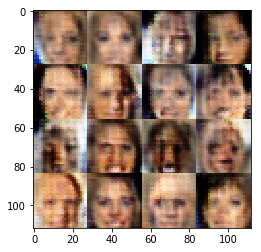

Epoch 1/2... Discriminator Loss: 1.3321... Generator Loss: 0.9433
Epoch 1/2... Discriminator Loss: 1.4392... Generator Loss: 0.6995
Epoch 1/2... Discriminator Loss: 1.3681... Generator Loss: 0.8212
Epoch 1/2... Discriminator Loss: 1.3586... Generator Loss: 0.8605
Epoch 1/2... Discriminator Loss: 1.3795... Generator Loss: 0.8738
Epoch 1/2... Discriminator Loss: 1.3963... Generator Loss: 0.9514
Epoch 1/2... Discriminator Loss: 1.3617... Generator Loss: 0.7449
Epoch 1/2... Discriminator Loss: 1.3887... Generator Loss: 0.8835
Epoch 1/2... Discriminator Loss: 1.3439... Generator Loss: 0.8124
Epoch 1/2... Discriminator Loss: 1.3484... Generator Loss: 0.8099


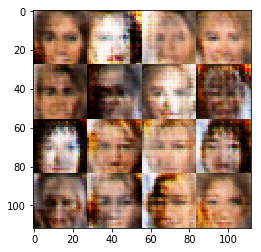

Epoch 1/2... Discriminator Loss: 1.4323... Generator Loss: 0.9185
Epoch 1/2... Discriminator Loss: 1.3902... Generator Loss: 0.7555
Epoch 1/2... Discriminator Loss: 1.3089... Generator Loss: 0.7925
Epoch 1/2... Discriminator Loss: 1.3365... Generator Loss: 0.7926
Epoch 1/2... Discriminator Loss: 1.3339... Generator Loss: 0.9315
Epoch 1/2... Discriminator Loss: 1.4410... Generator Loss: 0.6948
Epoch 1/2... Discriminator Loss: 1.3125... Generator Loss: 0.8848
Epoch 1/2... Discriminator Loss: 1.3825... Generator Loss: 0.8604
Epoch 1/2... Discriminator Loss: 1.3701... Generator Loss: 0.8003
Epoch 1/2... Discriminator Loss: 1.4137... Generator Loss: 0.6976


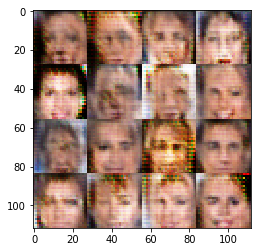

Epoch 1/2... Discriminator Loss: 1.3253... Generator Loss: 0.8784
Epoch 1/2... Discriminator Loss: 1.3733... Generator Loss: 0.8035
Epoch 1/2... Discriminator Loss: 1.2608... Generator Loss: 1.0848
Epoch 1/2... Discriminator Loss: 1.2951... Generator Loss: 0.7175
Epoch 1/2... Discriminator Loss: 1.3555... Generator Loss: 0.6131
Epoch 1/2... Discriminator Loss: 1.3597... Generator Loss: 1.3101
Epoch 1/2... Discriminator Loss: 1.2396... Generator Loss: 0.8245
Epoch 1/2... Discriminator Loss: 1.6132... Generator Loss: 1.1262
Epoch 1/2... Discriminator Loss: 1.4439... Generator Loss: 1.1064
Epoch 1/2... Discriminator Loss: 1.2941... Generator Loss: 1.4954


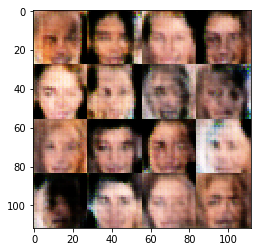

Epoch 1/2... Discriminator Loss: 1.3912... Generator Loss: 0.6710
Epoch 1/2... Discriminator Loss: 1.3379... Generator Loss: 0.7812
Epoch 1/2... Discriminator Loss: 1.1297... Generator Loss: 0.9745
Epoch 1/2... Discriminator Loss: 1.2796... Generator Loss: 0.8619
Epoch 1/2... Discriminator Loss: 1.5467... Generator Loss: 1.0854
Epoch 1/2... Discriminator Loss: 1.3783... Generator Loss: 0.7867
Epoch 1/2... Discriminator Loss: 0.9113... Generator Loss: 1.3395
Epoch 1/2... Discriminator Loss: 1.4238... Generator Loss: 0.9490
Epoch 1/2... Discriminator Loss: 1.3260... Generator Loss: 0.8224
Epoch 1/2... Discriminator Loss: 1.4248... Generator Loss: 0.8550


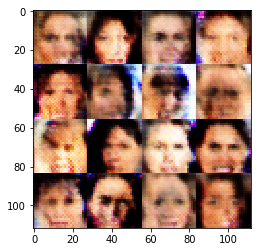

Epoch 1/2... Discriminator Loss: 1.3754... Generator Loss: 0.8305
Epoch 1/2... Discriminator Loss: 1.3654... Generator Loss: 0.8797
Epoch 1/2... Discriminator Loss: 1.3253... Generator Loss: 0.9693
Epoch 1/2... Discriminator Loss: 1.3508... Generator Loss: 0.8814
Epoch 1/2... Discriminator Loss: 1.4078... Generator Loss: 0.7489
Epoch 1/2... Discriminator Loss: 1.3650... Generator Loss: 0.8225
Epoch 1/2... Discriminator Loss: 1.4418... Generator Loss: 0.7887
Epoch 1/2... Discriminator Loss: 1.3971... Generator Loss: 0.9200
Epoch 1/2... Discriminator Loss: 1.3961... Generator Loss: 0.8085
Epoch 1/2... Discriminator Loss: 1.3402... Generator Loss: 0.7509


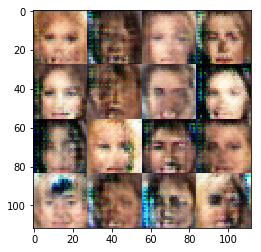

Epoch 1/2... Discriminator Loss: 1.3885... Generator Loss: 0.7848
Epoch 1/2... Discriminator Loss: 1.4455... Generator Loss: 0.7824
Epoch 1/2... Discriminator Loss: 1.3557... Generator Loss: 0.7824
Epoch 1/2... Discriminator Loss: 1.4567... Generator Loss: 0.7890
Epoch 1/2... Discriminator Loss: 1.3828... Generator Loss: 0.8148
Epoch 1/2... Discriminator Loss: 1.3863... Generator Loss: 0.8841
Epoch 1/2... Discriminator Loss: 1.3227... Generator Loss: 0.7934
Epoch 1/2... Discriminator Loss: 1.3206... Generator Loss: 0.8730
Epoch 2/2... Discriminator Loss: 1.4251... Generator Loss: 0.8813
Epoch 2/2... Discriminator Loss: 1.3077... Generator Loss: 0.8738


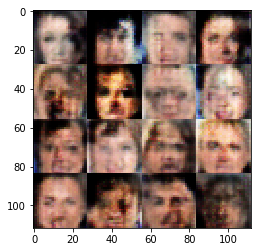

Epoch 2/2... Discriminator Loss: 1.3875... Generator Loss: 0.7312
Epoch 2/2... Discriminator Loss: 1.4031... Generator Loss: 0.9114
Epoch 2/2... Discriminator Loss: 1.2600... Generator Loss: 1.2521
Epoch 2/2... Discriminator Loss: 1.3848... Generator Loss: 1.0014
Epoch 2/2... Discriminator Loss: 1.3035... Generator Loss: 0.7184
Epoch 2/2... Discriminator Loss: 1.5050... Generator Loss: 0.5137
Epoch 2/2... Discriminator Loss: 1.1219... Generator Loss: 1.0826
Epoch 2/2... Discriminator Loss: 0.6933... Generator Loss: 1.5314
Epoch 2/2... Discriminator Loss: 0.9417... Generator Loss: 1.2569
Epoch 2/2... Discriminator Loss: 1.4307... Generator Loss: 0.6992


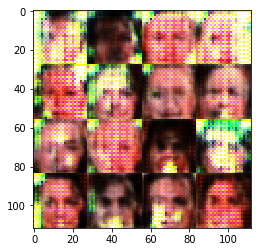

Epoch 2/2... Discriminator Loss: 1.0430... Generator Loss: 0.8315
Epoch 2/2... Discriminator Loss: 1.3659... Generator Loss: 0.6877
Epoch 2/2... Discriminator Loss: 1.4393... Generator Loss: 0.8538
Epoch 2/2... Discriminator Loss: 1.4978... Generator Loss: 0.7031
Epoch 2/2... Discriminator Loss: 1.2872... Generator Loss: 0.9787
Epoch 2/2... Discriminator Loss: 1.3237... Generator Loss: 0.9230
Epoch 2/2... Discriminator Loss: 1.3929... Generator Loss: 0.8280
Epoch 2/2... Discriminator Loss: 1.3248... Generator Loss: 0.7499
Epoch 2/2... Discriminator Loss: 1.2825... Generator Loss: 0.9245
Epoch 2/2... Discriminator Loss: 1.4038... Generator Loss: 0.8315


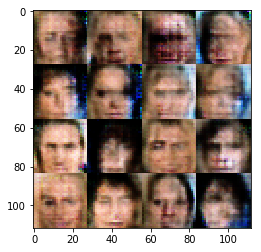

Epoch 2/2... Discriminator Loss: 1.3344... Generator Loss: 0.8873
Epoch 2/2... Discriminator Loss: 1.2639... Generator Loss: 0.9681
Epoch 2/2... Discriminator Loss: 1.3283... Generator Loss: 0.9113
Epoch 2/2... Discriminator Loss: 1.2303... Generator Loss: 0.8161
Epoch 2/2... Discriminator Loss: 1.3072... Generator Loss: 0.7991
Epoch 2/2... Discriminator Loss: 1.3361... Generator Loss: 0.8321
Epoch 2/2... Discriminator Loss: 1.4688... Generator Loss: 1.3772
Epoch 2/2... Discriminator Loss: 1.2917... Generator Loss: 0.8641
Epoch 2/2... Discriminator Loss: 1.3864... Generator Loss: 0.8080
Epoch 2/2... Discriminator Loss: 1.4419... Generator Loss: 1.2194


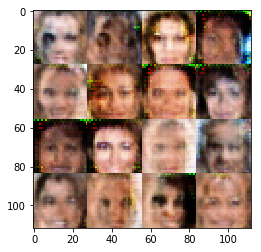

Epoch 2/2... Discriminator Loss: 1.1096... Generator Loss: 0.9442
Epoch 2/2... Discriminator Loss: 1.3673... Generator Loss: 0.5258
Epoch 2/2... Discriminator Loss: 1.2145... Generator Loss: 0.8847
Epoch 2/2... Discriminator Loss: 1.3430... Generator Loss: 0.7588
Epoch 2/2... Discriminator Loss: 1.4115... Generator Loss: 0.6866
Epoch 2/2... Discriminator Loss: 1.4149... Generator Loss: 0.8262
Epoch 2/2... Discriminator Loss: 1.3436... Generator Loss: 0.7139
Epoch 2/2... Discriminator Loss: 1.2448... Generator Loss: 1.1400
Epoch 2/2... Discriminator Loss: 1.4158... Generator Loss: 1.0799
Epoch 2/2... Discriminator Loss: 1.4833... Generator Loss: 0.4431


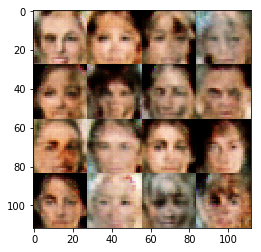

Epoch 2/2... Discriminator Loss: 1.3012... Generator Loss: 1.1257
Epoch 2/2... Discriminator Loss: 1.2788... Generator Loss: 1.1498
Epoch 2/2... Discriminator Loss: 1.4891... Generator Loss: 1.3604
Epoch 2/2... Discriminator Loss: 1.4732... Generator Loss: 0.4980
Epoch 2/2... Discriminator Loss: 1.3103... Generator Loss: 0.8742
Epoch 2/2... Discriminator Loss: 1.2873... Generator Loss: 1.0762
Epoch 2/2... Discriminator Loss: 1.2283... Generator Loss: 0.7688
Epoch 2/2... Discriminator Loss: 1.3628... Generator Loss: 1.0819
Epoch 2/2... Discriminator Loss: 1.4870... Generator Loss: 0.5124
Epoch 2/2... Discriminator Loss: 1.3724... Generator Loss: 0.5203


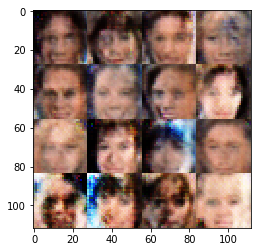

Epoch 2/2... Discriminator Loss: 1.6922... Generator Loss: 1.8914
Epoch 2/2... Discriminator Loss: 1.3654... Generator Loss: 0.7635
Epoch 2/2... Discriminator Loss: 1.7049... Generator Loss: 1.7150
Epoch 2/2... Discriminator Loss: 1.4008... Generator Loss: 0.6976
Epoch 2/2... Discriminator Loss: 1.2850... Generator Loss: 0.8052
Epoch 2/2... Discriminator Loss: 1.4254... Generator Loss: 1.1753
Epoch 2/2... Discriminator Loss: 1.2956... Generator Loss: 1.1439
Epoch 2/2... Discriminator Loss: 1.4039... Generator Loss: 1.0615
Epoch 2/2... Discriminator Loss: 1.3064... Generator Loss: 1.2790
Epoch 2/2... Discriminator Loss: 1.3134... Generator Loss: 0.7820


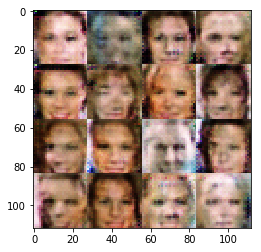

Epoch 2/2... Discriminator Loss: 1.3269... Generator Loss: 1.1497
Epoch 2/2... Discriminator Loss: 1.6841... Generator Loss: 1.6037
Epoch 2/2... Discriminator Loss: 1.4198... Generator Loss: 0.6327
Epoch 2/2... Discriminator Loss: 1.2535... Generator Loss: 0.9763
Epoch 2/2... Discriminator Loss: 1.3994... Generator Loss: 0.8083
Epoch 2/2... Discriminator Loss: 1.3752... Generator Loss: 1.0515
Epoch 2/2... Discriminator Loss: 1.3716... Generator Loss: 0.6107
Epoch 2/2... Discriminator Loss: 1.3254... Generator Loss: 0.7121
Epoch 2/2... Discriminator Loss: 1.2421... Generator Loss: 0.7530
Epoch 2/2... Discriminator Loss: 1.3848... Generator Loss: 0.9368


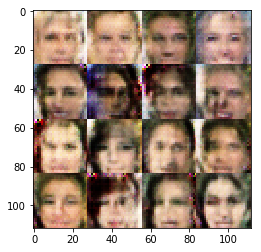

Epoch 2/2... Discriminator Loss: 1.3726... Generator Loss: 0.8336
Epoch 2/2... Discriminator Loss: 1.3443... Generator Loss: 0.8659
Epoch 2/2... Discriminator Loss: 1.3361... Generator Loss: 0.8633
Epoch 2/2... Discriminator Loss: 1.2487... Generator Loss: 0.9300
Epoch 2/2... Discriminator Loss: 1.5757... Generator Loss: 0.4231
Epoch 2/2... Discriminator Loss: 1.3049... Generator Loss: 0.9717
Epoch 2/2... Discriminator Loss: 1.3221... Generator Loss: 0.7234
Epoch 2/2... Discriminator Loss: 1.1992... Generator Loss: 0.9412
Epoch 2/2... Discriminator Loss: 1.3555... Generator Loss: 1.2460
Epoch 2/2... Discriminator Loss: 1.3777... Generator Loss: 0.8924


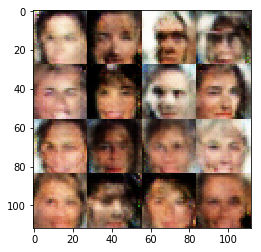

Epoch 2/2... Discriminator Loss: 1.2092... Generator Loss: 0.9138
Epoch 2/2... Discriminator Loss: 1.4663... Generator Loss: 0.4594
Epoch 2/2... Discriminator Loss: 1.3167... Generator Loss: 1.2832
Epoch 2/2... Discriminator Loss: 1.2982... Generator Loss: 0.7213
Epoch 2/2... Discriminator Loss: 1.3821... Generator Loss: 0.8512
Epoch 2/2... Discriminator Loss: 1.1716... Generator Loss: 1.1510
Epoch 2/2... Discriminator Loss: 1.3272... Generator Loss: 1.0843
Epoch 2/2... Discriminator Loss: 1.6849... Generator Loss: 0.4125
Epoch 2/2... Discriminator Loss: 1.3936... Generator Loss: 0.5225
Epoch 2/2... Discriminator Loss: 1.4922... Generator Loss: 0.5107


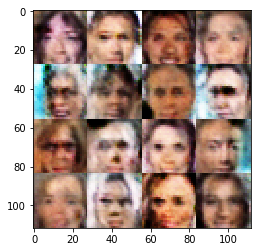

Epoch 2/2... Discriminator Loss: 1.2780... Generator Loss: 0.7149
Epoch 2/2... Discriminator Loss: 1.3582... Generator Loss: 0.9745
Epoch 2/2... Discriminator Loss: 1.2336... Generator Loss: 0.6926
Epoch 2/2... Discriminator Loss: 1.3058... Generator Loss: 0.8525
Epoch 2/2... Discriminator Loss: 1.3616... Generator Loss: 0.8039
Epoch 2/2... Discriminator Loss: 1.3198... Generator Loss: 0.7341
Epoch 2/2... Discriminator Loss: 1.3750... Generator Loss: 1.0852
Epoch 2/2... Discriminator Loss: 1.2972... Generator Loss: 0.6772
Epoch 2/2... Discriminator Loss: 1.3636... Generator Loss: 0.7238
Epoch 2/2... Discriminator Loss: 1.3041... Generator Loss: 0.8763


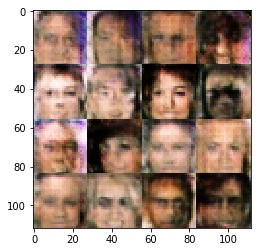

Epoch 2/2... Discriminator Loss: 1.2626... Generator Loss: 1.0208
Epoch 2/2... Discriminator Loss: 1.4189... Generator Loss: 0.5804
Epoch 2/2... Discriminator Loss: 1.2908... Generator Loss: 0.7068
Epoch 2/2... Discriminator Loss: 1.3041... Generator Loss: 0.8406
Epoch 2/2... Discriminator Loss: 1.5399... Generator Loss: 1.6338
Epoch 2/2... Discriminator Loss: 1.4310... Generator Loss: 1.2503
Epoch 2/2... Discriminator Loss: 1.2655... Generator Loss: 0.9852
Epoch 2/2... Discriminator Loss: 1.3166... Generator Loss: 0.6967
Epoch 2/2... Discriminator Loss: 1.6154... Generator Loss: 1.5951
Epoch 2/2... Discriminator Loss: 1.3210... Generator Loss: 0.8317


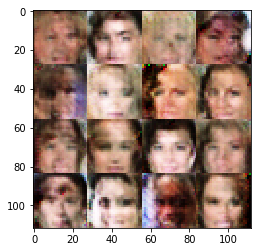

Epoch 2/2... Discriminator Loss: 1.2183... Generator Loss: 0.8659
Epoch 2/2... Discriminator Loss: 1.4141... Generator Loss: 0.9935
Epoch 2/2... Discriminator Loss: 1.3325... Generator Loss: 0.8315
Epoch 2/2... Discriminator Loss: 1.3345... Generator Loss: 1.0894
Epoch 2/2... Discriminator Loss: 1.4907... Generator Loss: 1.5481
Epoch 2/2... Discriminator Loss: 1.3538... Generator Loss: 0.9354
Epoch 2/2... Discriminator Loss: 1.1812... Generator Loss: 0.8397
Epoch 2/2... Discriminator Loss: 1.3331... Generator Loss: 0.7783
Epoch 2/2... Discriminator Loss: 1.3428... Generator Loss: 0.6364
Epoch 2/2... Discriminator Loss: 1.3418... Generator Loss: 0.8357


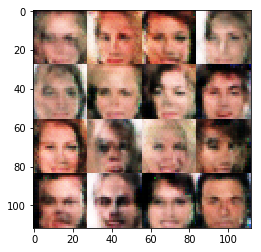

Epoch 2/2... Discriminator Loss: 1.3485... Generator Loss: 0.9922
Epoch 2/2... Discriminator Loss: 1.3925... Generator Loss: 0.6354
Epoch 2/2... Discriminator Loss: 1.3458... Generator Loss: 0.8591
Epoch 2/2... Discriminator Loss: 1.5031... Generator Loss: 0.5435
Epoch 2/2... Discriminator Loss: 1.3166... Generator Loss: 1.0199
Epoch 2/2... Discriminator Loss: 1.3406... Generator Loss: 0.9451
Epoch 2/2... Discriminator Loss: 1.3534... Generator Loss: 1.0862
Epoch 2/2... Discriminator Loss: 1.3307... Generator Loss: 0.7505
Epoch 2/2... Discriminator Loss: 1.4369... Generator Loss: 0.7496
Epoch 2/2... Discriminator Loss: 1.2696... Generator Loss: 1.0137


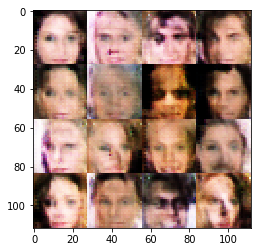

Epoch 2/2... Discriminator Loss: 1.5341... Generator Loss: 0.7373
Epoch 2/2... Discriminator Loss: 1.3433... Generator Loss: 0.7208
Epoch 2/2... Discriminator Loss: 1.3704... Generator Loss: 0.8661
Epoch 2/2... Discriminator Loss: 1.3775... Generator Loss: 0.5884
Epoch 2/2... Discriminator Loss: 1.4005... Generator Loss: 0.9363
Epoch 2/2... Discriminator Loss: 1.3805... Generator Loss: 0.5907
Epoch 2/2... Discriminator Loss: 1.2591... Generator Loss: 0.9659
Epoch 2/2... Discriminator Loss: 1.4368... Generator Loss: 0.5804
Epoch 2/2... Discriminator Loss: 1.3609... Generator Loss: 1.0086
Epoch 2/2... Discriminator Loss: 1.3194... Generator Loss: 0.7327


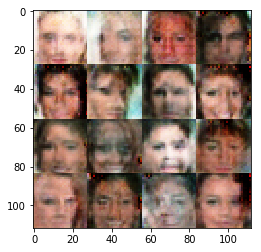

Epoch 2/2... Discriminator Loss: 1.3716... Generator Loss: 0.6981
Epoch 2/2... Discriminator Loss: 1.3588... Generator Loss: 0.7309
Epoch 2/2... Discriminator Loss: 1.2805... Generator Loss: 0.7647
Epoch 2/2... Discriminator Loss: 1.4278... Generator Loss: 1.2174
Epoch 2/2... Discriminator Loss: 1.3897... Generator Loss: 0.8138
Epoch 2/2... Discriminator Loss: 1.3495... Generator Loss: 0.7471
Epoch 2/2... Discriminator Loss: 1.2033... Generator Loss: 0.8238
Epoch 2/2... Discriminator Loss: 1.2803... Generator Loss: 0.8292
Epoch 2/2... Discriminator Loss: 1.2017... Generator Loss: 1.0913
Epoch 2/2... Discriminator Loss: 1.4264... Generator Loss: 0.7712


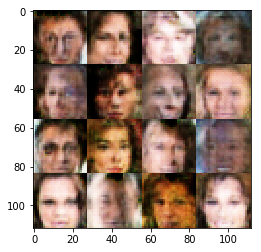

Epoch 2/2... Discriminator Loss: 1.3686... Generator Loss: 0.7961
Epoch 2/2... Discriminator Loss: 1.3792... Generator Loss: 1.1450
Epoch 2/2... Discriminator Loss: 1.3285... Generator Loss: 0.7877
Epoch 2/2... Discriminator Loss: 1.4453... Generator Loss: 0.6699
Epoch 2/2... Discriminator Loss: 1.4205... Generator Loss: 0.7246
Epoch 2/2... Discriminator Loss: 1.3454... Generator Loss: 0.7719


In [20]:
batch_size = 32
z_dim = 100
learning_rate = 0.001
beta1 = 0.3


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.